# Black Friday Dataset EDA And Feature Engineering

## Cleaning and preparing the data for model training

In [50]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [51]:
 # importing the dataset
 df_train = pd.read_csv("blackfriday_train.csv")

In [52]:
df_train

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969
...,...,...,...,...,...,...,...,...,...,...,...,...
550063,1006033,P00372445,M,51-55,13,B,1,1,20,NaN,NaN,368
550064,1006035,P00375436,F,26-35,1,C,3,0,20,NaN,NaN,371
550065,1006036,P00375436,F,26-35,15,B,4+,1,20,NaN,NaN,137
550066,1006038,P00375436,F,55+,1,C,2,0,20,NaN,NaN,365


### Problem Statement
 A retail company “ABC Private Limited” wants to understand the customer purchase behaviour (specifically, purchase amount) against various products of different categories. They have shared purchase summary of various customers for selected high volume products from last month. The data set also contains customer demographics (age, gender, marital status, city_type, stay_in_current_city), product details (product_id and product category) and Total purchase_amount from last month.

Now, they want to build a model to predict the purchase amount of customer against various products which will help them to create personalized offer for customers against different products.



In [53]:
## import the test data
df_test=pd.read_csv("blackfriday_train.csv")
df_test.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [54]:
# Merge both train and test data
import pandas as pd 
df=pd.concat([df_train,df_test])
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [55]:
##Basic
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1100136 entries, 0 to 550067
Data columns (total 12 columns):
 #   Column                      Non-Null Count    Dtype  
---  ------                      --------------    -----  
 0   User_ID                     1100136 non-null  int64  
 1   Product_ID                  1100136 non-null  object 
 2   Gender                      1100136 non-null  object 
 3   Age                         1100136 non-null  object 
 4   Occupation                  1100136 non-null  int64  
 5   City_Category               1100136 non-null  object 
 6   Stay_In_Current_City_Years  1100136 non-null  object 
 7   Marital_Status              1100136 non-null  int64  
 8   Product_Category_1          1100136 non-null  int64  
 9   Product_Category_2          752860 non-null   float64
 10  Product_Category_3          333642 non-null   float64
 11  Purchase                    1100136 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 109.1+ MB


In [56]:
df.describe()

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,1.100136e+06,1.100136e+06,1.100136e+06,1.100136e+06,752860.000000,333642.000000,1.100136e+06
mean,1.003029e+06,8.076707e+00,4.096530e-01,5.404270e+00,9.842329,12.668243,9.263969e+03
std,1.727591e+03,6.522658e+00,4.917699e-01,3.936210e+00,5.086586,4.125331,5.023063e+03
min,1.000001e+06,0.000000e+00,0.000000e+00,1.000000e+00,2.000000,3.000000,1.200000e+01
25%,1.001516e+06,2.000000e+00,0.000000e+00,1.000000e+00,5.000000,9.000000,5.823000e+03
50%,1.003077e+06,7.000000e+00,0.000000e+00,5.000000e+00,9.000000,14.000000,8.047000e+03
75%,1.004478e+06,1.400000e+01,1.000000e+00,8.000000e+00,15.000000,16.000000,1.205400e+04
max,1.006040e+06,2.000000e+01,1.000000e+00,2.000000e+01,18.000000,18.000000,2.396100e+04


In [57]:
df.drop(['User_ID'],axis=1,inplace=True)

In [58]:
df.head()

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [59]:
pd.get_dummies(df['Gender'],drop_first=1)

,M
0,False
1,False
2,False
3,False
4,True
...,...
550063,True
550064,False
550065,False
550066,False


#### Handling Categorical Feature Gender

In [60]:
df["Gender"]=df['Gender'].map({'F':0,'M':1})
df.head()

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,P00069042,0,0-17,10,A,2,0,3,NaN,NaN,8370
1,P00248942,0,0-17,10,A,2,0,1,6.0,14.0,15200
2,P00087842,0,0-17,10,A,2,0,12,NaN,NaN,1422
3,P00085442,0,0-17,10,A,2,0,12,14.0,NaN,1057
4,P00285442,1,55+,16,C,4+,0,8,NaN,NaN,7969


#### Handling Categorical Feature AGE

In [61]:
df['Age'].unique()

array(['0-17', '55+', '26-35', '46-50', '51-55', '36-45', '18-25'],
      dtype=object)

In [62]:
pd.get_dummies(df['Age'],drop_first=True).astype(int)

,18-25,26-35,36-45,46-50,51-55,55+
0,0,0,0,0,0,0
1,0,0,0,0,0,0
2,0,0,0,0,0,0
3,0,0,0,0,0,0
4,0,0,0,0,0,1
...,...,...,...,...,...,...
550063,0,0,0,0,1,0
550064,0,1,0,0,0,0
550065,0,1,0,0,0,0
550066,0,0,0,0,0,1


In [63]:
df['Ag']=df['Age'].map({'0-17':1,'18-25':2,'26-35':3,'36-45':4,'46-50':5,'51-55':6,'55+':7})

In [64]:
#second technique
from sklearn import preprocessing

#Label encoder object knows how to understand word lables.
label_encoder = preprocessing.LabelEncoder()

#Encode Labels in column 'species'.
df['Age']=label_encoder.fit_transform(df['Age'])

df['Age'].unique()

array([0, 6, 2, 4, 5, 3, 1])

In [65]:
df.head()

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,Ag
0,P00069042,0,0,10,A,2,0,3,NaN,NaN,8370,1
1,P00248942,0,0,10,A,2,0,1,6.0,14.0,15200,1
2,P00087842,0,0,10,A,2,0,12,NaN,NaN,1422,1
3,P00085442,0,0,10,A,2,0,12,14.0,NaN,1057,1
4,P00285442,1,6,16,C,4+,0,8,NaN,NaN,7969,7


In [66]:
#fixing categorical city_category
df_city=pd.get_dummies(df['City_Category'],drop_first=True).astype(int)

In [67]:
df_city.head()

,B,C
0,0,0
1,0,0
2,0,0
3,0,0
4,0,1


In [68]:
df=pd.concat([df,df_city],axis=1)
df.head()

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,Ag,B,C
0,P00069042,0,0,10,A,2,0,3,NaN,NaN,8370,1,0,0
1,P00248942,0,0,10,A,2,0,1,6.0,14.0,15200,1,0,0
2,P00087842,0,0,10,A,2,0,12,NaN,NaN,1422,1,0,0
3,P00085442,0,0,10,A,2,0,12,14.0,NaN,1057,1,0,0
4,P00285442,1,6,16,C,4+,0,8,NaN,NaN,7969,7,0,1


In [69]:
print(df.columns)

Index(['Product_ID', 'Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category_1',
       'Product_Category_2', 'Product_Category_3', 'Purchase', 'Ag', 'B', 'C'],
      dtype='object')


In [70]:
df.head()

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,Ag,B,C
0,P00069042,0,0,10,A,2,0,3,NaN,NaN,8370,1,0,0
1,P00248942,0,0,10,A,2,0,1,6.0,14.0,15200,1,0,0
2,P00087842,0,0,10,A,2,0,12,NaN,NaN,1422,1,0,0
3,P00085442,0,0,10,A,2,0,12,14.0,NaN,1057,1,0,0
4,P00285442,1,6,16,C,4+,0,8,NaN,NaN,7969,7,0,1


In [71]:
## Missing Values
df.isnull().sum()

Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            347276
Product_Category_3            766494
Purchase                           0
Ag                                 0
B                                  0
C                                  0
dtype: int64

In [72]:
## Focus on replacing missing values
df['Product_Category_2'].unique()

array([nan,  6., 14.,  2.,  8., 15., 16., 11.,  5.,  3.,  4., 12.,  9.,
       10., 17., 13.,  7., 18.])

In [73]:
df['Product_Category_2'].value_counts()

Product_Category_2
8.0     128176
14.0    110216
2.0      98434
16.0     86510
15.0     75710
5.0      52470
4.0      51354
6.0      32932
11.0     28268
17.0     26640
13.0     21062
9.0      11386
12.0     11056
10.0      6086
3.0       5768
18.0      5540
7.0       1252
Name: count, dtype: int64

In [74]:
df['Product_Category_2'].mode()[0]

8.0

In [75]:
# replace the missing value with mode
df['Product_Category_2'] = df['Product_Category_2'].fillna(df['Product_Category_2'])

In [76]:
df['Product_Category_2'].mode()

0    8.0
Name: Product_Category_2, dtype: float64

In [77]:
df['Product_Category_2'].isnull().sum()

347276

In [78]:
## product category 3 replacing missing values
df['Product_Category_3'].unique()

array([nan, 14., 17.,  5.,  4., 16., 15.,  8.,  9., 13.,  6., 12.,  3.,
       18., 11., 10.])

In [79]:
df['Product_Category_3'].value_counts()

Product_Category_3
16.0    65272
15.0    56026
14.0    36856
17.0    33404
5.0     33316
8.0     25124
9.0     23158
12.0    18492
13.0    10918
6.0      9780
18.0     9258
4.0      3750
11.0     3610
10.0     3452
3.0      1226
Name: count, dtype: int64

In [80]:
## Replacing the missing values with mode
df['Product_Category_3']=df['Product_Category_3'].fillna(df['Product_Category_3'])

In [81]:
df.head()

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,Ag,B,C
0,P00069042,0,0,10,A,2,0,3,NaN,NaN,8370,1,0,0
1,P00248942,0,0,10,A,2,0,1,6.0,14.0,15200,1,0,0
2,P00087842,0,0,10,A,2,0,12,NaN,NaN,1422,1,0,0
3,P00085442,0,0,10,A,2,0,12,14.0,NaN,1057,1,0,0
4,P00285442,1,6,16,C,4+,0,8,NaN,NaN,7969,7,0,1


In [82]:
df.shape

(1100136, 14)

In [83]:
df['Stay_In_Current_City_Years'].unique()

array(['2', '4+', '3', '1', '0'], dtype=object)

In [84]:
df['Stay_In_Current_City_Years'].str.replace('+' , '')

0         2
1         2
2         2
3         2
4         4
         ..
550063    1
550064    3
550065    4
550066    2
550067    4
Name: Stay_In_Current_City_Years, Length: 1100136, dtype: object

In [85]:
df.head()

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,Ag,B,C
0,P00069042,0,0,10,A,2,0,3,NaN,NaN,8370,1,0,0
1,P00248942,0,0,10,A,2,0,1,6.0,14.0,15200,1,0,0
2,P00087842,0,0,10,A,2,0,12,NaN,NaN,1422,1,0,0
3,P00085442,0,0,10,A,2,0,12,14.0,NaN,1057,1,0,0
4,P00285442,1,6,16,C,4+,0,8,NaN,NaN,7969,7,0,1


In [86]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1100136 entries, 0 to 550067
Data columns (total 14 columns):
 #   Column                      Non-Null Count    Dtype  
---  ------                      --------------    -----  
 0   Product_ID                  1100136 non-null  object 
 1   Gender                      1100136 non-null  int64  
 2   Age                         1100136 non-null  int32  
 3   Occupation                  1100136 non-null  int64  
 4   City_Category               1100136 non-null  object 
 5   Stay_In_Current_City_Years  1100136 non-null  object 
 6   Marital_Status              1100136 non-null  int64  
 7   Product_Category_1          1100136 non-null  int64  
 8   Product_Category_2          752860 non-null   float64
 9   Product_Category_3          333642 non-null   float64
 10  Purchase                    1100136 non-null  int64  
 11  Ag                          1100136 non-null  int64  
 12  B                           1100136 non-null  int32  
 13  C  

In [96]:
##Convert object into integers
df['Stay_In_Current_City_Years']=df['Stay_In_Current_City_Years'].replace('4+',4)
df['Stay_In_Current_City_Years']=df['Stay_In_Current_City_Years'].astype(int)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1100136 entries, 0 to 550067
Data columns (total 14 columns):
 #   Column                      Non-Null Count    Dtype  
---  ------                      --------------    -----  
 0   Product_ID                  1100136 non-null  object 
 1   Gender                      1100136 non-null  int64  
 2   Age                         1100136 non-null  int32  
 3   Occupation                  1100136 non-null  int64  
 4   City_Category               1100136 non-null  object 
 5   Stay_In_Current_City_Years  1100136 non-null  int32  
 6   Marital_Status              1100136 non-null  int64  
 7   Product_Category_1          1100136 non-null  int64  
 8   Product_Category_2          752860 non-null   float64
 9   Product_Category_3          333642 non-null   float64
 10  Purchase                    1100136 non-null  int64  
 11  Ag                          1100136 non-null  int64  
 12  B                           1100136 non-null  int32  
 13  C  

In [88]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1100136 entries, 0 to 550067
Data columns (total 14 columns):
 #   Column                      Non-Null Count    Dtype  
---  ------                      --------------    -----  
 0   Product_ID                  1100136 non-null  object 
 1   Gender                      1100136 non-null  int64  
 2   Age                         1100136 non-null  int32  
 3   Occupation                  1100136 non-null  int64  
 4   City_Category               1100136 non-null  object 
 5   Stay_In_Current_City_Years  1100136 non-null  object 
 6   Marital_Status              1100136 non-null  int64  
 7   Product_Category_1          1100136 non-null  int64  
 8   Product_Category_2          752860 non-null   float64
 9   Product_Category_3          333642 non-null   float64
 10  Purchase                    1100136 non-null  int64  
 11  Ag                          1100136 non-null  int64  
 12  B                           1100136 non-null  int32  
 13  C  

In [89]:
df['B']=df['B'].astype(int)
df['C']=df['C'].astype(int)

In [90]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1100136 entries, 0 to 550067
Data columns (total 14 columns):
 #   Column                      Non-Null Count    Dtype  
---  ------                      --------------    -----  
 0   Product_ID                  1100136 non-null  object 
 1   Gender                      1100136 non-null  int64  
 2   Age                         1100136 non-null  int32  
 3   Occupation                  1100136 non-null  int64  
 4   City_Category               1100136 non-null  object 
 5   Stay_In_Current_City_Years  1100136 non-null  object 
 6   Marital_Status              1100136 non-null  int64  
 7   Product_Category_1          1100136 non-null  int64  
 8   Product_Category_2          752860 non-null   float64
 9   Product_Category_3          333642 non-null   float64
 10  Purchase                    1100136 non-null  int64  
 11  Ag                          1100136 non-null  int64  
 12  B                           1100136 non-null  int32  
 13  C  

<Axes: xlabel='Age', ylabel='Purchase'>

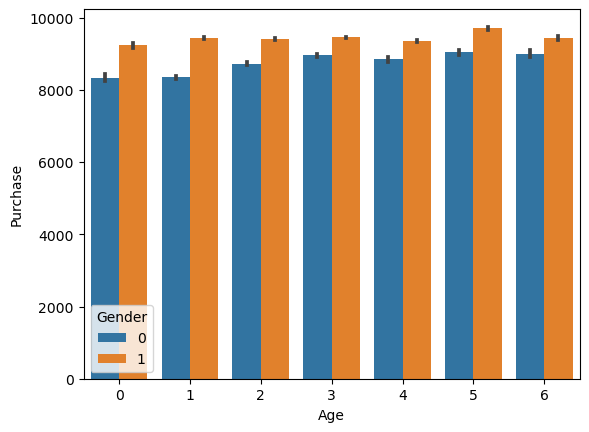

In [92]:
##Visualization
sns.barplot(x='Age',y='Purchase',hue='Gender',data=df)

## Purchsing of men is high then women

<Axes: xlabel='Occupation', ylabel='Purchase'>

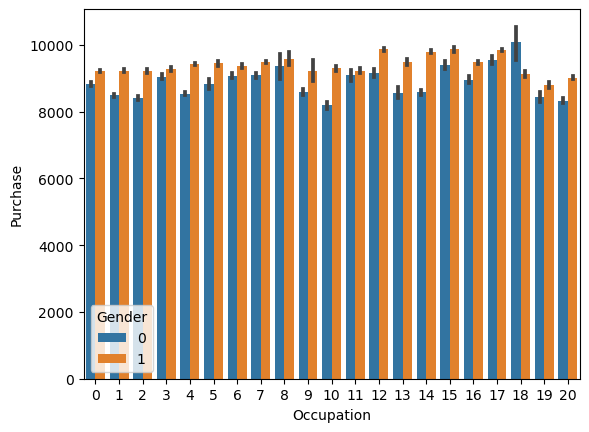

In [93]:
##Visualization of Purchase with occupation
sns.barplot(x='Occupation',y='Purchase',hue='Gender',data=df)

<Axes: xlabel='Product_Category_1', ylabel='Purchase'>

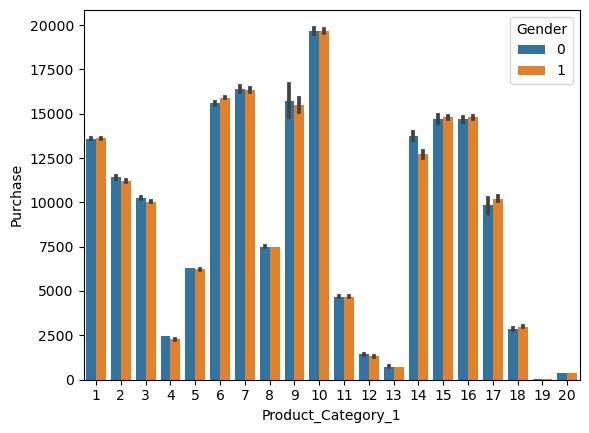

In [95]:
sns.barplot(x='Product_Category_1',y='Purchase',hue='Gender',data=df)

<Axes: xlabel='Product_Category_2', ylabel='Purchase'>

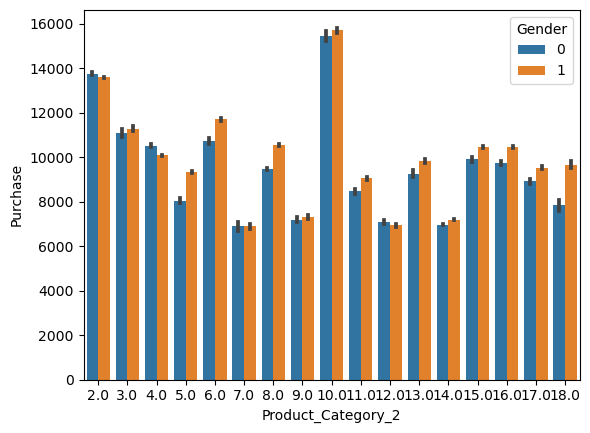

In [98]:
sns.barplot(x='Product_Category_2',y='Purchase',hue='Gender',data=df)

In [99]:
df.head()

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,Ag,B,C
0,P00069042,0,0,10,A,2,0,3,NaN,NaN,8370,1,0,0
1,P00248942,0,0,10,A,2,0,1,6.0,14.0,15200,1,0,0
2,P00087842,0,0,10,A,2,0,12,NaN,NaN,1422,1,0,0
3,P00085442,0,0,10,A,2,0,12,14.0,NaN,1057,1,0,0
4,P00285442,1,6,16,C,4,0,8,NaN,NaN,7969,7,0,1


## Feature Scaling

In [100]:
df_test=df[df['Purchase'].isnull()]

In [101]:
df[-df['Purchase'].isnull()]

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,Ag,B,C
0,P00069042,0,0,10,A,2,0,3,NaN,NaN,8370,1,0,0
1,P00248942,0,0,10,A,2,0,1,6.0,14.0,15200,1,0,0
2,P00087842,0,0,10,A,2,0,12,NaN,NaN,1422,1,0,0
3,P00085442,0,0,10,A,2,0,12,14.0,NaN,1057,1,0,0
4,P00285442,1,6,16,C,4,0,8,NaN,NaN,7969,7,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
550063,P00372445,1,5,13,B,1,1,20,NaN,NaN,368,6,1,0
550064,P00375436,0,2,1,C,3,0,20,NaN,NaN,371,3,0,1
550065,P00375436,0,2,15,B,4,1,20,NaN,NaN,137,3,1,0
550066,P00375436,0,6,1,C,2,0,20,NaN,NaN,365,7,0,1


In [160]:
X=df_train.drop('Purchase',axis=1)

In [161]:
df_train=df[-df['Purchase'].isnull()]

In [164]:
X.shape

(1100136, 13)

In [165]:
X.head()

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Ag,B,C
0,P00069042,0,0,10,A,2,0,3,NaN,NaN,1,0,0
1,P00248942,0,0,10,A,2,0,1,6.0,14.0,1,0,0
2,P00087842,0,0,10,A,2,0,12,NaN,NaN,1,0,0
3,P00085442,0,0,10,A,2,0,12,14.0,NaN,1,0,0
4,P00285442,1,6,16,C,4,0,8,NaN,NaN,7,0,1


In [166]:
y=df_train['Purchase']


In [167]:
y.shape

(1100136,)

In [168]:
y

0          8370
1         15200
2          1422
3          1057
4          7969
          ...  
550063      368
550064      371
550065      137
550066      365
550067      490
Name: Purchase, Length: 1100136, dtype: int64

In [169]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(
    x,y, test_size=0.33,random_state=42)

In [ ]:
X_train.drop('Product_ID',axis=1,inplace=True)
X_test.drop('Product_ID',axis=1,inplace=True)

In [158]:
## feature scaling
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.transform(x.test)

ValueError: could not convert string to float: 'A'